### Actividad con API's

In [2]:
import pandas as pd
import numpy as np
import os
import warnings
import datetime as dt
import requests

warnings.filterwarnings("ignore")

### ABSTRACT:

Se trabaja este desafío con dos APIs:

1. APIs Públicas (API para el cálculo de tipo de cambio y otra para la obtención de crímenes cometidos en el Reino Unido)
2. Adobe Analytics API

A continuación se mostrará el desarrollo del desafío.

### Consulta de API's Públicas

En los siguientes dos ejercicio, harémos la consulta de las siguientes APIs:

1. Consulta del tipo de cambio para una moneda particular.
2. Consulta de información de crímenes para una zona geolocalizada en el reino Unido.

1. **API para la consulta del tipo de cambio de diferentes tipos de monedas**

Con la siguiente llamada podemos saber cuales son todas la monedas para las cuales podemos consultar su tipo de cambio. 


In [6]:
#Definimos la URL mediante la cual usaremos requests.
url = "https://currency-exchange.p.rapidapi.com/listquotes"

headers = {
	"X-RapidAPI-Key": "7f0e652b86mshb66750b39b0df5ap1aad76jsnf13f490efee5",
	"X-RapidAPI-Host": "currency-exchange.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

print(response.json())

['SGD', 'MYR', 'EUR', 'USD', 'AUD', 'JPY', 'CNH', 'HKD', 'CAD', 'INR', 'DKK', 'GBP', 'RUB', 'NZD', 'MXN', 'IDR', 'TWD', 'THB', 'VND']


Vemos que disponemos de información de diferentes tipos de monedas. En este ejercicio usarémos las monedas de "MXN" (Peso Mexicano) y "USD" (Dólares)

In [8]:
#Obtención del tipo de cambio de Dolares (USD) a Pesos Mexicanos (MXN). 
url = "https://currency-exchange.p.rapidapi.com/exchange"

#En este caso, queremos determinar cuando equivale un Dolar a pesos Mexicanos.
querystring = {"from":"USD","to":"MXN","q":"1.0"}
# En este caso, tenemos qu eusar los parámetros de from (moneda a convertir), to (moneda de converisón de destino) y q (cantidad a convertir)

headers = {
	"X-RapidAPI-Key": "7f0e652b86mshb66750b39b0df5ap1aad76jsnf13f490efee5",
	"X-RapidAPI-Host": "currency-exchange.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

17.090600000000002


Así, vemos que un dolar (USD) equivale a 17.1 pesos mexicanos (MXN) 

2. **API para la extracción de crímenes cometido en el Reino Unido**

En la siguiente API harémos una extracción de los principales crímenes cometidos en una localización particular del país de UK y harémos una pequeña exploración visual de las diferentes variables de interés.

Ésta API no requiere autenticación alguna por lo que el query se contruye directamente desde la URL y no requiere parámetros adicionales.

Para este ejemplo, **se extrae la información de las diferentes fuerzas policiacas en función de su localización geográfica en el reino unido.**

In [23]:
import json
url = "https://data.police.uk/api/forces"

response = requests.get(url)

print(response.text) #Imprimimos mediante un string como se visualiza la salida de la respuesta de la API. 

[{"id":"avon-and-somerset","name":"Avon and Somerset Constabulary"},{"id":"bedfordshire","name":"Bedfordshire Police"},{"id":"cambridgeshire","name":"Cambridgeshire Constabulary"},{"id":"cheshire","name":"Cheshire Constabulary"},{"id":"city-of-london","name":"City of London Police"},{"id":"cleveland","name":"Cleveland Police"},{"id":"cumbria","name":"Cumbria Constabulary"},{"id":"derbyshire","name":"Derbyshire Constabulary"},{"id":"devon-and-cornwall","name":"Devon & Cornwall Police"},{"id":"dorset","name":"Dorset Police"},{"id":"durham","name":"Durham Constabulary"},{"id":"dyfed-powys","name":"Dyfed-Powys Police"},{"id":"essex","name":"Essex Police"},{"id":"gloucestershire","name":"Gloucestershire Constabulary"},{"id":"greater-manchester","name":"Greater Manchester Police"},{"id":"gwent","name":"Gwent Police"},{"id":"hampshire","name":"Hampshire Constabulary"},{"id":"hertfordshire","name":"Hertfordshire Constabulary"},{"id":"humberside","name":"Humberside Police"},{"id":"kent","name":

In [25]:
#Cargamos el texto del reponse a un tipo de formato JSON.
jsondata = json.loads(response.text)
jsondata


[{'id': 'avon-and-somerset', 'name': 'Avon and Somerset Constabulary'},
 {'id': 'bedfordshire', 'name': 'Bedfordshire Police'},
 {'id': 'cambridgeshire', 'name': 'Cambridgeshire Constabulary'},
 {'id': 'cheshire', 'name': 'Cheshire Constabulary'},
 {'id': 'city-of-london', 'name': 'City of London Police'},
 {'id': 'cleveland', 'name': 'Cleveland Police'},
 {'id': 'cumbria', 'name': 'Cumbria Constabulary'},
 {'id': 'derbyshire', 'name': 'Derbyshire Constabulary'},
 {'id': 'devon-and-cornwall', 'name': 'Devon & Cornwall Police'},
 {'id': 'dorset', 'name': 'Dorset Police'},
 {'id': 'durham', 'name': 'Durham Constabulary'},
 {'id': 'dyfed-powys', 'name': 'Dyfed-Powys Police'},
 {'id': 'essex', 'name': 'Essex Police'},
 {'id': 'gloucestershire', 'name': 'Gloucestershire Constabulary'},
 {'id': 'greater-manchester', 'name': 'Greater Manchester Police'},
 {'id': 'gwent', 'name': 'Gwent Police'},
 {'id': 'hampshire', 'name': 'Hampshire Constabulary'},
 {'id': 'hertfordshire', 'name': 'Hertford

In [29]:
#Transformamos nuestro JSON a un datafrmae
df = pd.DataFrame.from_dict(jsondata)
df.head() #Imrpmie solo 5 registros para tener un oveweview general.

,id,name
0,avon-and-somerset,Avon and Somerset Constabulary
1,bedfordshire,Bedfordshire Police
2,cambridgeshire,Cambridgeshire Constabulary
3,cheshire,Cheshire Constabulary
4,city-of-london,City of London Police


En el siguiente **ejemplo se extrae la  información a nivel calle de los crímenes cometidos dada una Latitud y Longitud particular en el último mes dentro del país de UK.**

In [39]:
#Parámetros: 
# all-crime: estarémos extrayendo todos los críemenes cometidos para todas las categorías
# lat: Latitud donde se realizó algún crímen particular.
# lng: Longitud donde se realizó un crimen particular
# date : fecha de reporte de un crímen

url = "https://data.police.uk/api/crimes-street/all-crime?lat=52.629729&lng=-1.131592"

response = requests.get(url)
json_data = json.loads(response.text)
print(response.text) #Imprime la respuesta de la solicitud al endpoint.

[{"category":"anti-social-behaviour","location_type":"Force","location":{"latitude":"52.633938","street":{"id":1737254,"name":"On or near King Richards Road"},"longitude":"-1.152162"},"context":"","outcome_status":null,"persistent_id":"","id":111328869,"location_subtype":"","month":"2023-06"},{"category":"anti-social-behaviour","location_type":"Force","location":{"latitude":"52.637041","street":{"id":1738379,"name":"On or near Parking Area"},"longitude":"-1.131222"},"context":"","outcome_status":null,"persistent_id":"","id":111328861,"location_subtype":"","month":"2023-06"},{"category":"anti-social-behaviour","location_type":"Force","location":{"latitude":"52.625255","street":{"id":1739323,"name":"On or near St James Road"},"longitude":"-1.114156"},"context":"","outcome_status":null,"persistent_id":"","id":111328856,"location_subtype":"","month":"2023-06"},{"category":"anti-social-behaviour","location_type":"Force","location":{"latitude":"52.629337","street":{"id":1739119,"name":"On or

In [40]:
#Transforma el JSON type a un DataFrame
df = pd.DataFrame.from_dict(json_data)
df


,category,location_type,location,context,outcome_status,persistent_id,id,location_subtype,month
0,anti-social-behaviour,Force,"{'latitude': '52.633938', 'street': {'id': 173...",,None,,111328869,,2023-06
1,anti-social-behaviour,Force,"{'latitude': '52.637041', 'street': {'id': 173...",,None,,111328861,,2023-06
2,anti-social-behaviour,Force,"{'latitude': '52.625255', 'street': {'id': 173...",,None,,111328856,,2023-06
3,anti-social-behaviour,Force,"{'latitude': '52.629337', 'street': {'id': 173...",,None,,111328839,,2023-06
4,anti-social-behaviour,Force,"{'latitude': '52.633897', 'street': {'id': 173...",,None,,111329082,,2023-06
...,...,...,...,...,...,...,...,...,...
1507,other-crime,Force,"{'latitude': '52.634136', 'street': {'id': 173...",,"{'category': 'Awaiting court outcome', 'date':...",d25064f58076da42da781e577566796a414e291cba1e4c...,111321670,,2023-06
1508,other-crime,Force,"{'latitude': '52.637627', 'street': {'id': 173...",,"{'category': 'Under investigation', 'date': '2...",ce0854b10691e6cc7ad657334c4716618e7b4757c52f0d...,111319787,,2023-06
1509,other-crime,BTP,"{'latitude': '52.629997', 'street': {'id': 234...",,"{'category': 'Under investigation', 'date': '2...",,111421745,STATION,2023-06
1510,other-crime,Force,"{'latitude': '52.636557', 'street': {'id': 173...",,"{'category': 'Under investigation', 'date': '2...",5ea2c9457a2ed78ce4235af219751c8afdea0b50eb149b...,111328306,,2023-06


In [41]:
#Imprimmos la estructura de nuestro DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   category          1512 non-null   object
 1   location_type     1512 non-null   object
 2   location          1512 non-null   object
 3   context           1512 non-null   object
 4   outcome_status    1401 non-null   object
 5   persistent_id     1512 non-null   object
 6   id                1512 non-null   int64 
 7   location_subtype  1512 non-null   object
 8   month             1512 non-null   object
dtypes: int64(1), object(8)
memory usage: 106.4+ KB


**Data visualization**

A continuación, hacemos un gráfico sencillo sobre como se visualiza la información de los crímenes por categoría de crímen

***Crímenes por tipo de categoría***

[Text(0, 0, 'anti-social-behaviour'),
 Text(1, 0, 'public-order'),
 Text(2, 0, 'other-crime'),
 Text(3, 0, 'drugs'),
 Text(4, 0, 'other-theft'),
 Text(5, 0, 'robbery'),
 Text(6, 0, 'possession-of-weapons'),
 Text(7, 0, 'theft-from-the-person'),
 Text(8, 0, 'bicycle-theft'),
 Text(9, 0, 'vehicle-crime'),
 Text(10, 0, 'burglary'),
 Text(11, 0, 'criminal-damage-arson'),
 Text(12, 0, 'shoplifting'),
 Text(13, 0, 'violent-crime')]

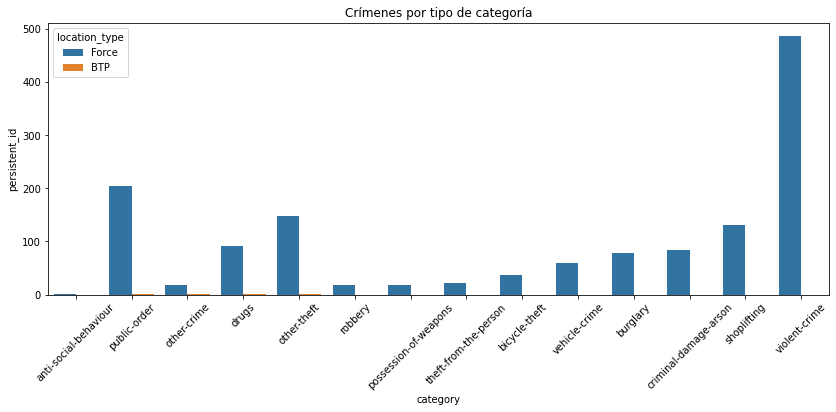

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

df_crimes = df.groupby(by = ["category","location_type"]).agg({'persistent_id': lambda x: x.nunique(dropna=True)}).reset_index()
df_crimes.sort_values(by = "persistent_id", inplace=True)

fig, x = plt.subplots(figsize = (14,5))
k = sns.barplot(data= df_crimes, x = "category", y = "persistent_id", hue = 'location_type', ax = x)
k.set_title("Crímenes por tipo de categoría")
k.set_xticklabels(k.get_xticklabels(), rotation = 45)

Cómo se observa en el gráfico anterior, las siguientes categorías de crímenes ocupan el top 3 de incidencias:

1. Violent-crime
2. Anti social behaviour
3. Ohter theft

A continuación, harémos un último gráfico para delimitar la información de la categoría "violnet-crime" por el estatus correspondiente legal.

***Situación legal de los casos reportados reportados para los crímenes tipificados como "Violent-crime"***

[Text(0, 0, 'Under investigation'),
 Text(1, 0, 'Unable to prosecute suspect'),
 Text(2, 0, 'Investigation complete; no suspect identified'),
 Text(3, 0, 'Awaiting court outcome'),
 Text(4, 0, 'Formal action is not in the public interest'),
 Text(5, 0, 'Local resolution'),
 Text(6, 0, 'Further action is not in the public interest'),
 Text(7, 0, 'Action to be taken by another organisation'),
 Text(8, 0, 'Further investigation is not in the public interest')]

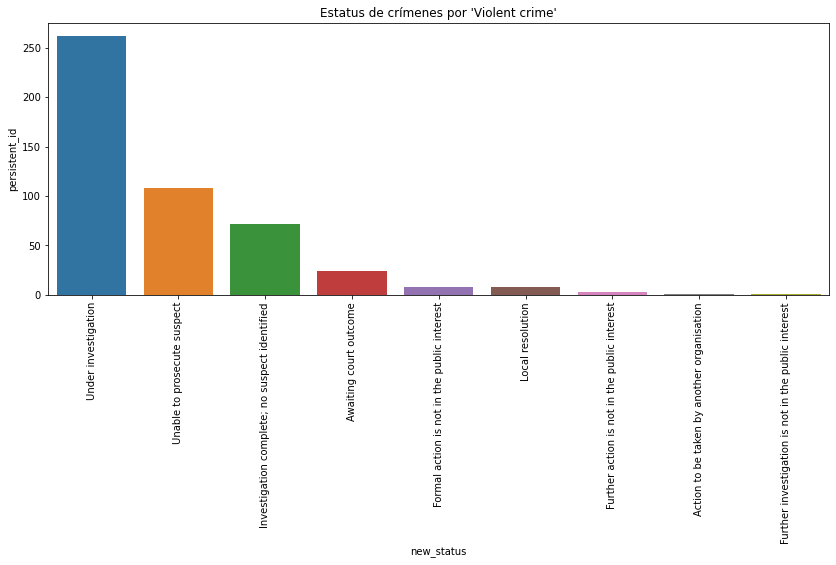

In [74]:
df.loc[:,"new_status"] = df["outcome_status"].fillna("No status available").map(lambda x: x["category"] if x != "No status available" else x)

df_crimes = df[df["category"] == "violent-crime"].groupby(by = ["category","new_status"]).agg({'persistent_id': lambda x: x.nunique(dropna=True)}).reset_index()
df_crimes.sort_values(by = "persistent_id", inplace=True, ascending = False)

fig, x = plt.subplots(figsize = (14,5))
k = sns.barplot(data= df_crimes, x = "new_status", y = "persistent_id", ax = x)
k.set_title("Estatus de crímenes por 'Violent crime'")
k.set_xticklabels(k.get_xticklabels(), rotation = 90)

De esta manera, se observa que gran parte de los casos reportados se encuentran "Bajo investigación", esto es, existe una investigación en curso al respecto sobre el crímen cometido. Dicho reason acapara más del 60% de los casos y sería comprénsible dado que son casos recientes abiertors o reportados.

Un dato interesante es el segundo reason con poco más de 100 casos: "Unable to prosecute suspect", el cual, indicaría que el juez no puede proceder con alguna condena de cara a que no existe suficiente evidencia.

### Adobe Analytics API

En el siguiente ejemplo, harémos uso de un script interno de la compañía que nos permite extraer diferentes indicadores de performance digital sobre las URLs de un sitio de ecommerce. 

El proceso se realizó a través de KEYs privadas y autenticación JWT que se provee por parte del equipo de soporte de Adobe.

Adobe Analytics proporciona dos API's:

1. DataWarehouse
2. Analytics 2.0

En este caso utilizaremos la API 2.0 la cual extrae y proveé información con una estructura similar a los reportes disponibilidados por parte de la plataforma. 

Previamente de cara a este ejercicio, se levantó permisos como desarrollador y se extrajeron todos los parámetros de KEYs y Clients IDs para guardarlos en un archivo de configuración del tipo "init" , el cual se irá leyendo conforme el código manda las solicitudes correspondiente a los servers de Adobe para el levantamiento de los accesos. 

In [75]:
#Adobe Analytics API 2.0 Connection
import configparser
import logging
import datetime as dt
import requests
import jwt
import os 
import pandas as pd

logging.basicConfig(level="INFO")
logger = logging.getLogger()
os.chdir("C:/Users/abrah/Documents/Adobe_Analytics_API") # Establecemos el path sobre el cual tenemos las credenciales de acceso.

rsid = 'rsid_example' # Determinamos el reporte del cual extraeremos la información. 
global_company_id = 'gid_example' #Establecemos el parámetro sobre el cual extraeremos la información de una cuenta particular de Adobe Analytics.
rsid_addon = f'?rsid={rsid}'


#El siguiente método codigica una KEY del tipo JWT el cual será intercambiado posteriormente por un "Access token"
def get_jwt_token(config):
    with open(config["key_path"], 'r') as file:
        private_key = file.read()
    return jwt.encode({
        "exp": dt.datetime.utcnow() + dt.timedelta(seconds = 30),
        "iss": config["orgid"],
        "sub": config["technicalaccountid"],
        "https://{}/s/{}".format(config["imshost"], config["metascopes"]):True,
        "aud":"https://{}/c/{}".format(config["imshost"], config["apikey"])
    }, private_key, algorithm='RS256')

#El método inferior utiliza un método post para la resolución 
def get_access_token(config, jwt_token):
    post_body = {
        "client_id" : config["apikey"],
        "client_secret" : config["secret"],
        "jwt_token": jwt_token
    }
    logger.info("Sending 'POST' request to {}".format(config["imsexchange"]))
    logger.info("Post body: {}".format(post_body))
    
    return  requests.post(config["imsexchange"], data = post_body).json()["access_token"]

config_parser = configparser.ConfigParser()
config_parser.read("config.ini") 
config = dict(config_parser["default"])
jwt_token = get_jwt_token(config) # Obtenemos el Token JWT para intercambiar por un token de acceso genérico.

post_body_jwt_token = {
    "client_id" : config["apikey"],
    "client_secret" : config["secret"],
    "jwt_token": jwt_token
}

response =  requests.post(config["imsexchange"], data = post_body_jwt_token) # Usamos el método post sobre el endpoint https://ims-na1.adobelogin.com/ims/exchange/jwt
access_token = response.json()["access_token"] #Extraemos de la respuesta el token de acceso.

################## Definimos el Header que irá dentro de los parámetros de solicitud tipo POST ########################
header = {
    "Accept" : 'application/json',
    "Authorization" : "Bearer {}".format(access_token),
    "x-api-key" : config["apikey"],
    "x-proxy-global-company-id" : global_company_id
}

######### Construimos el Query del reporte #########################
base_url = "{}/{}/".format(config["analyticsapiurl"],global_company_id)
post_report_url = base_url + 'reports' + rsid_addon #El endpoint paa extracción de información es https://analytics.adobe.io/api

mets = ['metrics/pageviews','metrics/bouncerate',"metrics/visits","metrics/bounces","metrics/evar7instances","metrics/event1","metrics/event407","metrics/exits","metrics/pageevents","metrics/visitors", 
        "metrics/carts"] #Define las métricas a obtener
dim = "variables/evar7" # Define las dimensiones a extraer del reporte.
start_date = "2023-08-01" #Fecha de inicio de información. 
end_date = "2023-08-04" #Fecha de fin de información
midnight = "T00:00:00.000"
date_range = start_date + midnight + '/' + end_date + midnight

mets_obj = [{'id':x} for x in mets]

#Construye el query del reporte en el input que la documentación de Adobe Analytics API solicita.
report_body = {
    "rsid":rsid,
    "globalFilters":[
        {
            "type":"dateRange",
            "dateRange": date_range
        }
    ],
    "metricContainer":{
        "metrics":mets_obj
    },
    "dimension":dim,
    "settings":{
    "dimensionSort":"asc",
    "limit":50000
    }
}

response = requests.post(url = post_report_url, headers=header, json = report_body)


Imprimimos la respuesta de la solicitud hecha a los server de Adobe Analytics donde se visualizará la información a nivel URL de los diferentes métricas solicitidas. Ésto, primero en un JSON type.

In [76]:
response.json()

{'totalPages': 7,
 'firstPage': True,
 'lastPage': False,
 'numberOfElements': 50000,
 'number': 0,
 'totalElements': 302116,
 'columns': {'dimension': {'id': 'variables/evar7', 'type': 'string'},
  'columnIds': ['1ecb4ef0-afdc-466f-9d1f-7e59a94618d7',
   '85309906-12c4-41c8-8f74-3dc09cf52830',
   '6f10bd24-4984-46ac-800e-d3ec985817d7',
   'ac6496ae-cf97-4894-808a-f7f5fd130311',
   'c1b963e2-3b1f-4e3c-8ded-37f3cc3a2b73',
   '9da3a8e2-1f3c-49c3-acf5-e8c763ceb927',
   '0db2cc9f-5f9f-464d-a9fe-2f166df15925',
   '605a0850-50f0-4b4e-b966-511e94c3b2c8',
   '61b14c07-916a-4156-aaae-ea75d8180016',
   '772cf8b1-48ee-4dac-b8f5-d55ed4d8fe1c',
   '678691fe-7138-4e9d-b764-cc3da352d547']},
 'rows': [{'itemId': '0',
   'value': 'Unspecified',
   'data': [3496300.0,
    0.20303972585353472,
    461817.0,
    51192.0,
    0.0,
    643147.0,
    277323.0,
    252128.0,
    4964898.0,
    292687.0,
    4225.0]},
  {'itemId': '249',
   'value': 'https://www.bodegaaurrera.com.mx/ip/colchones/cama-kessa-mue

Posteriormente, transformamos nuestro json type en una estructrua de **DataFrame**

In [79]:
df = pd.concat([pd.DataFrame(response.json().get("rows",[])).iloc[:,:-1],pd.DataFrame(pd.DataFrame(response.json().get("rows",[]))["data"].to_list(), columns=mets)], axis="columns")
df = df.rename(columns = {'value':dim})
df.sort_values(by = ["metrics/pageviews"], ascending=False, inplace=True)
df

,itemId,variables/evar7,metrics/pageviews,metrics/bouncerate,metrics/visits,metrics/bounces,metrics/evar7instances,metrics/event1,metrics/event407,metrics/exits,metrics/pageevents,metrics/visitors,metrics/carts
0,0,Unspecified,3496300.0,0.20304,461817.0,51192.0,0.0,643147.0,277323.0,252128.0,4964898.0,292687.0,4225.0
23065,329145030,https://ecommercesite/tu-cuenta/pedidos,35939.0,0.335329,17254.0,784.0,65481.0,1.0,1.0,4347.0,29542.0,10819.0,0.0
41237,584045411,https://ecommercesite/tu-cuenta/iniciar-sesion,33374.0,0.0131,5276.0,6.0,45141.0,0.0,0.0,1291.0,11767.0,1620.0,0.0
47107,665188284,https://ecommercesite/tu-cuenta/verificacion-m...,30107.0,0.0,9975.0,0.0,77287.0,1.0,1.0,669.0,47180.0,8999.0,0.0
38805,551179074,https://ecommercesite/ip/pantallas/tv-samsung-...,29900.0,0.020137,7993.0,135.0,62176.0,9273.0,244.0,6364.0,32276.0,7246.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19275,274110945,https://ecommercesite/tu-cuenta/pedidos/777236...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
19274,274101033,https://ecommercesite/p/sandalias-peanuts-tall...,0.0,0.4,16.0,4.0,19.0,0.0,0.0,13.0,19.0,16.0,0.0
38348,544700469,https://ecommercesite/ip/plomeria-y-bano/conec...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
19268,273941643,https://ecommercesite/ip/plomeria-y-bano/llave...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


Del ejercicio anterior, esta información nos sería de utilidad ya que nos permitiría obtener a nivel usuario la interacción dentro de nuestro Website y poder complementar información y variables que ayuden a mejorar el perofrmance de prediccióna para nuestro modelo de "Churn".